In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('atlantic.csv')

###cleaning data###
df = df[df.iloc[:,10]!=-999]
df['Latitude'] = df['Latitude'].str.replace('[a-zA-Z]','').astype(float)
df['Longitude'] = df['Longitude'].str.replace('[a-zA-Z]','').astype(float)
df['Longitude'] = -1*df['Longitude'] #since the longtitude is in the west

# strip white space and create status list
df['Name'] = df['Name'].apply(lambda x: x.strip())
df['Status_Str'] = df['Status'].loc[:]
df['Status'] = df['Status'].apply(lambda x: x.strip())
status_list = list(pd.unique(df['Status']))
print(status_list)

status_dict = {'TD': 'Tropical cyclone of tropical depression intensity (< 34 knots)'  
               'TS': 'Tropical cyclone of tropical storm intensity (34-63 knots) ' 
               'HU': 'Tropical cyclone of hurricane intensity (> 64 knots)'  
               'EX': 'Extratropical cyclone (of any intensity)'  
               'SD': 'Subtropical cyclone of subtropical depression intensity (< 34 knots)'  
               'SS': 'Subtropical cyclone of subtropical storm intensity (> 34 knots)'  
               'LO': 'A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)'  
               'WV': 'Tropical Wave (of any intensity)  DB – Disturbance (of any intensity)' }

# make the status an integer value for classification
for i in range(len(status_list)):
    df['Status'].replace(status_list[i], i, inplace=True)
    
df.head()

['TD', 'TS', 'HU', 'EX', 'WV', 'LO', 'SS', 'SD', 'DB']


/Users/925984/envs/data_query/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.

/Users/925984/envs/data_query/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

The default value of regex will change from True to False in a future version.



,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Status_Str
43104,AL012004,ALEX,20040731,1800,,0,30.3,-78.3,25,1010,...,0,0,0,0,0,0,0,0,0,TD
43105,AL012004,ALEX,20040801,0,,0,31.0,-78.8,25,1009,...,0,0,0,0,0,0,0,0,0,TD
43106,AL012004,ALEX,20040801,600,,0,31.5,-79.0,25,1009,...,0,0,0,0,0,0,0,0,0,TD
43107,AL012004,ALEX,20040801,1200,,0,31.6,-79.1,30,1009,...,0,0,0,0,0,0,0,0,0,TD
43108,AL012004,ALEX,20040801,1800,,1,31.6,-79.2,35,1009,...,0,0,0,0,0,0,0,0,0,TS


In [22]:
### Helper variables to visualize hurricane trajectory###
ID = pd.unique(df['ID'])

# get idea of spread of data
print(df['Latitude'].describe())
print('--------')
print(df['Longitude'].describe())

count    5921.000000
mean       26.609053
std        10.639764
min         8.300000
25%        17.900000
50%        25.400000
75%        33.000000
max        69.000000
Name: Latitude, dtype: float64
--------
count    5921.000000
mean      -60.573467
std        21.382350
min      -106.700000
25%       -78.100000
50%       -62.000000
75%       -43.900000
max        -0.000000
Name: Longitude, dtype: float64


In [38]:
df.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

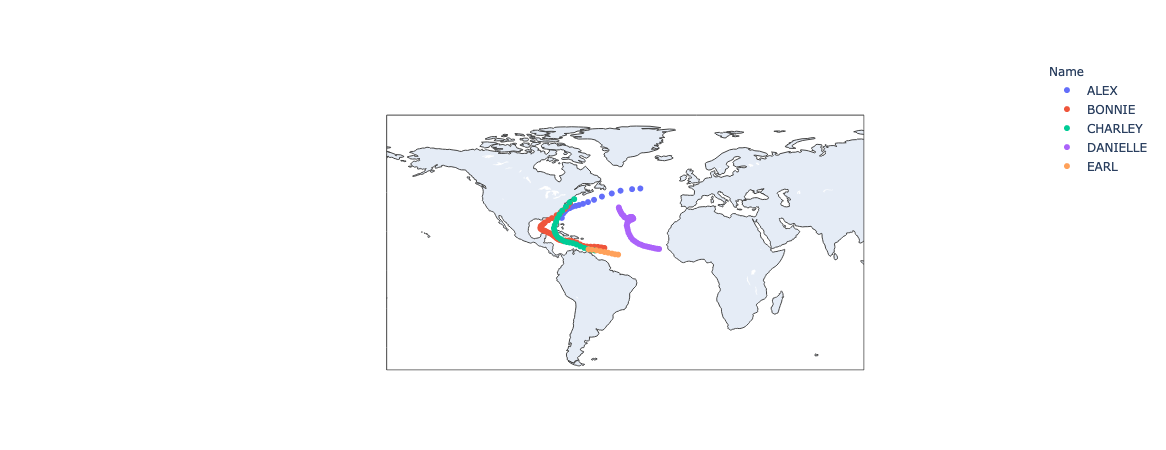

In [62]:
# plot the first 5 storms in the dataset
import plotly.express as px
fig = px.scatter_geo(df[df['ID'].isin(ID[0:5])], lat='Latitude', lon='Longitude', 
                     color='Name', hover_name='ID', hover_data=['Date', 'Name', 'Status_Str'],
                     center={'lat':32.00, 'lon':-82.84},
                     )
fig.show()

In [66]:
feat_columns = ['Status', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']
print(feat_columns)

['Status', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [91]:
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

feat_df = df[feat_columns]
feat_df.isna().sum()
numeric_map = feat_df.applymap(is_real_and_finite)
for feat in feat_columns: 
    if (numeric_map[feat]==False).sum():
        print(f'Missing Value found in column: {feat}')

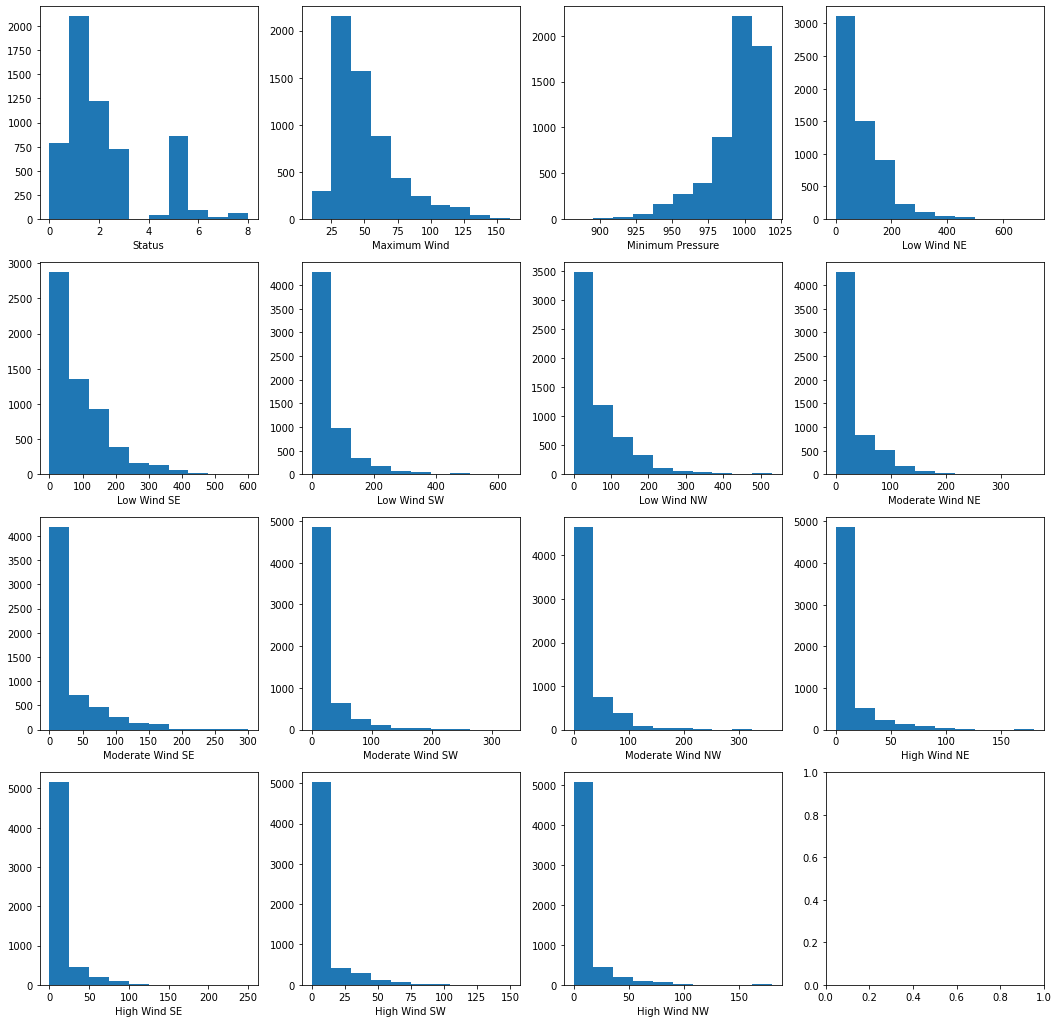

In [70]:
#visualizing the features
N = len(feat_columns)
n = int(np.sqrt(N))
fig, axes = plt.subplots(n+1, n+1, figsize=(6*n, 6*n))
ax = axes.ravel()
for i in range(N):
    ax[i].hist(df[feat_columns[i]])
    ax[i].set_xlabel(feat_columns[i])

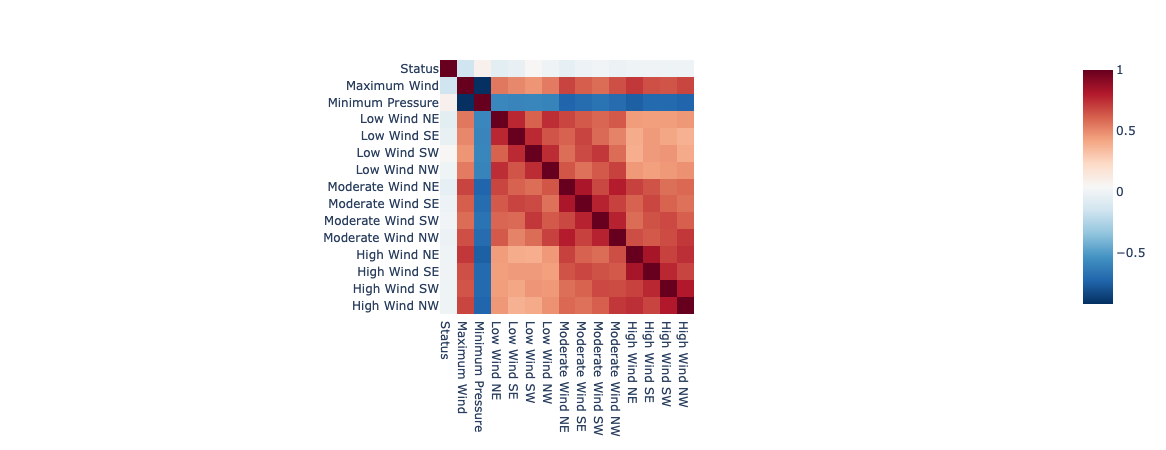

In [115]:
# create heatmap of pearson correlation of features
corr = df[feat_columns].corr(method='pearson')
fig = px.imshow(corr,
                x=feat_columns,
                y=feat_columns,
                color_continuous_scale='RdBu_r'
               )
fig.show()

[0.65494979 0.10970193 0.04386336 0.03875538 0.03538911 0.02778715
 0.02418346 0.01583164 0.01361641 0.01101179]


<AxesSubplot:xlabel='PC', ylabel='Var'>

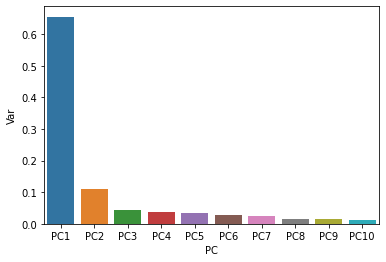

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Xs = StandardScaler().fit_transform(df[feat_columns[1:]])  # we exclude 'Status' from feat_columns
pca = PCA(n_components=10)
pc_df = pca.fit_transform(Xs)

print(pca.explained_variance_ratio_)
pca_df = pd.DataFrame({'Var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})

sns.barplot(x='PC', y='Var', data=pca_df)

- PC1 explains more than 60% of the variance in the data

In [118]:
#number of components to capture 90% of variance

pca = PCA(0.9)
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

print('number of PCs to keep:',pca.n_components_)

number of PCs to keep: 6


In [122]:
### visualizing data set related to the Status using t-sne with PCs = 6 ###

from sklearn.manifold import TSNE

pca = PCA(n_components=6)
pc = pca.fit_transform(Xs)
tsne = TSNE(n_components=2).fit_transform(pc)
df[['tsne-1', 'tsne-2']]=tsne

<AxesSubplot:xlabel='tsne-1', ylabel='tsne-2'>

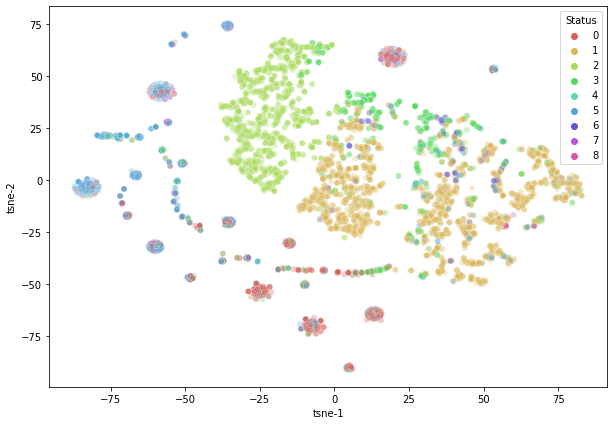

In [123]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x='tsne-1', y='tsne-2', hue=df['Status'], 
                palette=sns.color_palette("hls",9), data=df[['tsne-1', 'tsne-2']], legend='full', alpha=0.3)

In [134]:
### classifying the Status with K-nearest neighbor on SMOTE-balanced data, no PCA ###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
import time
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(df[feat_columns], df['Status'], test_size=0.3)

y_train = y_train.astype(int) #need to convert to int for SMOTE 

# oversample with SMOTE technique
oversample = SMOTE() 
X_train, y_train = oversample.fit_resample(X_train, y_train)
 
knnscore = 0
time_start = time.time()

for i in range(3,20):
    knn = KNeighborsClassifier(n_neighbors = i)

    knn.fit(X_train, y_train)
    knn_score = knn.score(X_test, y_test)
    y_pred = knn.predict(X_test)
    if knn_score > knnscore:
        knnscore = knn_score
        a = i

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
print("Optimal K:{}".format(a))
print("KNN score:{}".format(knnscore))
print("KNN time elapsed:{}".format(time.time()-time_start))

[[168   0   0   6   0  53   0   0   0]
 [  0 489   6  49   0  12  71   0  18]
 [  0   8 355   3   0   0   0   0   0]
 [ 21  23  10 137   0  18  11   0   0]
 [  7   0   0   0   1  10   0   0   0]
 [ 61  12   0   8   2 161   3   0   0]
 [  0   6   0   1   0   0  22   0   2]
 [  3   0   0   0   0   2   0   0   0]
 [  0   1   0   0   0  13   1   0   3]]
              precision    recall  f1-score   support

           0      0.646     0.740     0.690       227
           1      0.907     0.758     0.826       645
           2      0.957     0.970     0.963       366
           3      0.672     0.623     0.646       220
           4      0.333     0.056     0.095        18
           5      0.599     0.652     0.624       247
           6      0.204     0.710     0.317        31
           7      0.000     0.000     0.000         5
           8      0.130     0.167     0.146        18

    accuracy                          0.752      1777
   macro avg      0.494     0.519     0.479      177

/Users/925984/envs/data_query/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/925984/envs/data_query/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/925984/envs/data_query/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Counter({1: 2100, 2: 1226, 5: 863, 0: 788, 3: 721, 6: 95, 8: 62, 4: 46, 7: 20})


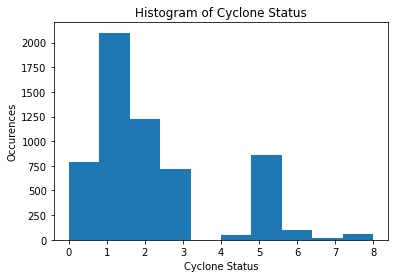

In [125]:
# investigate class imbalances in the cyclone status feature 
from collections import Counter
counter = Counter(df['Status'])
print(counter)
plt.hist(df['Status'])
plt.title('Histogram of Cyclone Status')
plt.xlabel('Cyclone Status')
plt.ylabel('Occurences')
plt.show()

Counter({0: 2100, 1: 2100, 2: 2100, 3: 2100, 4: 2100, 5: 2100, 6: 2100, 7: 2100, 8: 2100})


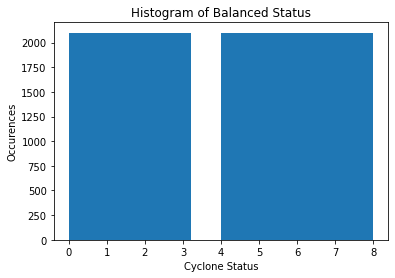

In [158]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

feat_columns = ['Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']

# transform the dataset with SMOTE 
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(df[feat_columns], df['Status'])

# count samples in new data
counter = Counter(y_balanced)
print(counter)

plt.hist(y_balanced)
plt.title('Histogram of Balanced Status')
plt.xlabel('Cyclone Status')
plt.ylabel('Occurences')
plt.show()


In [154]:
### classifying the Status with K-nearest neighbor using PCA, imbalanced data###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(df[feat_columns], df['Status'], test_size=0.3)

pca.fit(X_train, y_train)
print(X_train.shape)

scores = {}
time_start = time.time()

# find optimal k
for i in range(2,int(np.sqrt(df.shape[0]))):
    knn_unbalanced = KNeighborsClassifier(n_neighbors = i)
    
    knn_unbalanced.fit(pca.transform(X_train), y_train)
    knn_score = knn_unbalanced.score(pca.transform(X_test), y_test)

    scores[i] = knn_score

# choose best k and train model again
opt_k = max(scores, key=scores.get)
knn_unbalanced = KNeighborsClassifier(n_neighbors = opt_k)
knn_unbalanced.fit(pca.transform(X_train), y_train)
y_pred = knn_unbalanced.predict(pca.transform(X_test))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))
print(f"Optimal K:{opt_k}")
print(f"KNN score:{scores[opt_k]}")
print(f"KNN time elapsed:{time.time()-time_start}")

(4144, 14)
[[157   0   0   2   0  68   0   0   0]
 [  0 626   7  12   0   0   0   0   0]
 [  0  18 348   0   0   0   0   0   0]
 [ 17  42  10 133   0  17   0   0   1]
 [  7   0   0   0   0  11   0   0   0]
 [ 52  16   0   8   0 168   0   0   3]
 [  0  27   0   4   0   0   0   0   0]
 [  3   0   0   0   0   2   0   0   0]
 [  0   5   0   0   0  11   0   0   2]]
              precision    recall  f1-score   support

           0      0.665     0.692     0.678       227
           1      0.853     0.971     0.908       645
           2      0.953     0.951     0.952       366
           3      0.836     0.605     0.702       220
           4      0.000     0.000     0.000        18
           5      0.606     0.680     0.641       247
           6      0.000     0.000     0.000        31
           7      0.000     0.000     0.000         5
           8      0.333     0.111     0.167        18

    accuracy                          0.807      1777
   macro avg      0.472     0.445     0.4

In [155]:
### classifying the Status with K-nearest neighbor on SMOTE-balanced data, using PCA  ###

X_train, X_test, y_train, y_test = train_test_split(df[feat_columns], df['Status'], test_size=0.3)
y_train = y_train.astype(int) #need to convert to int for SMOTE 

# oversample with SMOTE technique
oversample = SMOTE() 
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)
 
pca.fit(X_train_balanced, y_train_balanced)

scores = {}
time_start = time.time()

# find optimal k
for i in range(2,int(np.sqrt(df.shape[0]))):
    knn_balanced = KNeighborsClassifier(n_neighbors = i)
    
    knn_balanced.fit(pca.transform(X_train_balanced), y_train_balanced)
    knn_score = knn_balanced.score(pca.transform(X_test), y_test)

    scores[i] = knn_score

# choose best k and train model again
opt_k = max(scores, key=scores.get)
knn_balanced = KNeighborsClassifier(n_neighbors = opt_k)
knn_balanced.fit(pca.transform(X_train_balanced), y_train_balanced)
y_pred = knn_balanced.predict(pca.transform(X_test))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))
print(f"Optimal K:{opt_k}")
print(f"KNN score:{scores[opt_k]}")
print(f"KNN time elapsed:{time.time()-time_start}")

[[127   0   0   8  24  28   0  31   9]
 [  0 593   7  18   0   6  17   0   4]
 [  0  21 343   2   0   0   0   0   0]
 [ 22  32   5 143   1  13   3   0   1]
 [  6   0   0   0  11   0   0   0   1]
 [ 51  12   0  15  78  56   1  11  23]
 [  0  11   0   5   0   2  13   0   0]
 [  4   0   0   0   0   1   0   0   0]
 [  1   5   0   0   2   4   0   0   6]]
              precision    recall  f1-score   support

           0      0.602     0.559     0.580       227
           1      0.880     0.919     0.899       645
           2      0.966     0.937     0.951       366
           3      0.749     0.650     0.696       220
           4      0.095     0.611     0.164        18
           5      0.509     0.227     0.314       247
           6      0.382     0.419     0.400        31
           7      0.000     0.000     0.000         5
           8      0.136     0.333     0.194        18

    accuracy                          0.727      1777
   macro avg      0.480     0.517     0.466      177

In [160]:
### classifying the Status with K-nearest neighbor on randomly oversampled balanced data, using PCA  ###

# oversample with SMOTE technique
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_oversample, y_train_oversample = oversample.fit_resample(X_train, y_train)
 
pca.fit(X_train_oversample, y_train_oversample)

scores = {}
time_start = time.time()

# find optimal k
for i in range(2,int(np.sqrt(df.shape[0]))):
    knn_balanced = KNeighborsClassifier(n_neighbors = i)
    
    knn_balanced.fit(pca.transform(X_train_oversample), y_train_oversample)
    knn_score = knn_balanced.score(pca.transform(X_test), y_test)

    scores[i] = knn_score

# choose best k and train model again
opt_k = max(scores, key=scores.get)
knn_balanced = KNeighborsClassifier(n_neighbors = opt_k)
knn_balanced.fit(pca.transform(X_train_oversample), y_train_oversample)
y_pred = knn_balanced.predict(pca.transform(X_test))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))
print(f"Optimal K:{opt_k}")
print(f"KNN score:{scores[opt_k]}")
print(f"KNN time elapsed:{time.time()-time_start}")

[[116   0   0   2   0  42   0  67   0]
 [  0 621   3  20   0   1   0   0   0]
 [  0  22 344   0   0   0   0   0   0]
 [ 16  35   9 136   0  11   2  11   0]
 [  5   0   0   0   0  11   0   2   0]
 [ 39  14   0   8   0 150   1  35   0]
 [  0  23   0   6   0   1   1   0   0]
 [  2   0   0   0   0   0   0   3   0]
 [  0   5   0   0   0  12   0   1   0]]
              precision    recall  f1-score   support

           0      0.652     0.511     0.573       227
           1      0.863     0.963     0.910       645
           2      0.966     0.940     0.953       366
           3      0.791     0.618     0.694       220
           4      0.000     0.000     0.000        18
           5      0.658     0.607     0.632       247
           6      0.250     0.032     0.057        31
           7      0.025     0.600     0.048         5
           8      0.000     0.000     0.000        18

    accuracy                          0.772      1777
   macro avg      0.467     0.475     0.430      177

In [156]:
### classifying the Status with Support Vector Machine on class unbalanced data###

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

time_start = time.time()

sigmas = np.array([1e-3, 1e-2, 1e-1, 1, 10, 100])
gammas = 1. / 2 / sigmas**2

alphas = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])
Cs = 1 / alphas

parameter_ranges = {'C': Cs, 'gamma': gammas}

svc = SVC(kernel = 'rbf')

svc_search = GridSearchCV(svc, parameter_ranges, cv = 3)
svc_search.fit(pca.transform(X_train), y_train)
print("SVM time elapsed:{}".format(time.time()-time_start))
print("Optimum hyperparameters:{}".format(svc_search.best_estimator_))

SVM time elapsed:1577.8260750770569
Optimum hyperparameters:SVC(C=10.0, gamma=5e-05)


In [161]:
best_svc = svc_search.best_estimator_
print("SVM score:{}".format(best_svc.score(pca.transform(X_test), y_test)))

SVM score:0.4811480022509848


In [167]:
### classifying the unbalanced data Status with Decision tree ###
from sklearn.tree import DecisionTreeClassifier

time_start = time.time()

tree = DecisionTreeClassifier()
tree.fit(pca.transform(X_train), y_train)
y_pred = tree.predict(pca.transform(X_test))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

print("Decision Tree score:{}".format(tree.score(pca.transform(X_test), y_test)))
print("Decision Tree time elapsed:{}".format(time.time()-time_start))

[[156   0   0   5   0  66   0   0   0]
 [  0 571  20  33   0   8  11   0   2]
 [  0  10 348   6   0   1   1   0   0]
 [ 19  29   4 140   0  22   6   0   0]
 [  7   0   0   0   0  11   0   0   0]
 [ 51  13   1   7   0 173   2   0   0]
 [  0  14   0   6   0   3   8   0   0]
 [  3   0   0   0   0   2   0   0   0]
 [  0   3   0   0   0  13   0   0   2]]
              precision    recall  f1-score   support

           0      0.661     0.687     0.674       227
           1      0.892     0.885     0.889       645
           2      0.933     0.951     0.942       366
           3      0.711     0.636     0.671       220
           4      0.000     0.000     0.000        18
           5      0.579     0.700     0.634       247
           6      0.286     0.258     0.271        31
           7      0.000     0.000     0.000         5
           8      0.500     0.111     0.182        18

    accuracy                          0.787      1777
   macro avg      0.507     0.470     0.474      177

In [169]:
## Decision tree on SMOTE balanced data ##

time_start = time.time()

tree = DecisionTreeClassifier()
tree.fit(pca.transform(X_train_balanced), y_train_balanced)
y_pred = tree.predict(pca.transform(X_test))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

print("Decision Tree score:{}".format(tree.score(pca.transform(X_test), y_test)))
print("Decision Tree time elapsed:{}".format(time.time()-time_start))

[[ 30   0   0   5  24  34   0 111  23]
 [  0 551  21  32   0   8  29   0   4]
 [  0  15 348   3   0   0   0   0   0]
 [  8  30   6 143   4  15   2   8   4]
 [  0   0   0   0  12   2   0   2   2]
 [ 10  14   0   6  32  85   1  41  58]
 [  0   8   1   4   0   1  16   0   1]
 [  2   0   0   0   1   0   0   2   0]
 [  0   2   0   0   0   3   0   1  12]]
              precision    recall  f1-score   support

           0      0.600     0.132     0.217       227
           1      0.889     0.854     0.871       645
           2      0.926     0.951     0.938       366
           3      0.741     0.650     0.692       220
           4      0.164     0.667     0.264        18
           5      0.574     0.344     0.430       247
           6      0.333     0.516     0.405        31
           7      0.012     0.400     0.024         5
           8      0.115     0.667     0.197        18

    accuracy                          0.675      1777
   macro avg      0.484     0.576     0.449      177

In [170]:
## Decision tree on randomly oversampled balanced data ##

time_start = time.time()

tree = DecisionTreeClassifier()
tree.fit(pca.transform(X_train_oversample), y_train_oversample)
y_pred = tree.predict(pca.transform(X_test))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

print("Decision Tree score:{}".format(tree.score(pca.transform(X_test), y_test)))
print("Decision Tree time elapsed:{}".format(time.time()-time_start))

[[ 48   0   0   5   0  53   0 121   0]
 [  0 571  22  31   0   8  11   0   2]
 [  0  11 348   5   0   1   1   0   0]
 [ 12  30   3 141   0  17   6  11   0]
 [  3   0   0   0   0  11   0   4   0]
 [ 14  11   1   6   0 161   4  50   0]
 [  0  14   0   6   0   3   8   0   0]
 [  2   0   0   0   0   0   0   3   0]
 [  0   3   0   0   0  12   0   1   2]]
              precision    recall  f1-score   support

           0      0.608     0.211     0.314       227
           1      0.892     0.885     0.889       645
           2      0.930     0.951     0.941       366
           3      0.727     0.641     0.681       220
           4      0.000     0.000     0.000        18
           5      0.605     0.652     0.628       247
           6      0.267     0.258     0.262        31
           7      0.016     0.600     0.031         5
           8      0.500     0.111     0.182        18

    accuracy                          0.721      1777
   macro avg      0.505     0.479     0.436      177

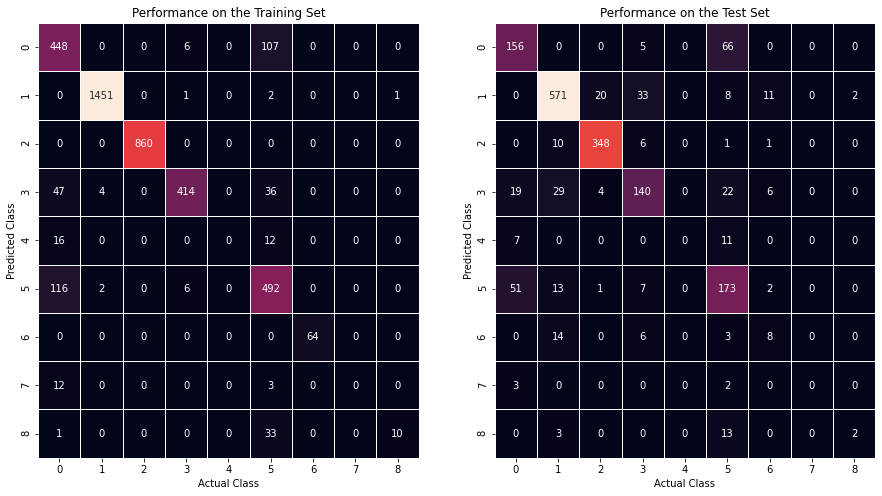

In [168]:
### visualizing the performace of decision tree ###
y_trainpredict = tree.predict(pca.transform(X_train))
heatmap_train = confusion_matrix(y_train, y_trainpredict)

y_testpredict = tree.predict(pca.transform(X_test))
heatmap_test = confusion_matrix(y_test, y_testpredict)

fig, axes = plt.subplots(1, 2, figsize = (15, 8))
sns.heatmap(heatmap_train, annot = True, cbar = False, linewidth = .5, ax = axes[0], fmt = 'd')
sns.heatmap(heatmap_test, annot = True, cbar = False, linewidth = .5, ax = axes[1], fmt = 'd')

axes[0].set_xlabel('Actual Class')
axes[0].set_ylabel('Predicted Class')
axes[0].set_title('Performance on the Training Set')

axes[1].set_xlabel('Actual Class')
axes[1].set_ylabel('Predicted Class')
axes[1].set_title('Performance on the Test Set');

In [215]:
## Random forest classifier on unbalanced data##
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(n_estimators=100, criterion='gini')
# fit the model on the whole dataset
model.fit(pca.transform(X_train), y_train)
time_start = time.time()

y_pred = model.predict(pca.transform(X_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

print("Random Forest score:{}".format(model.score(pca.transform(X_test), y_test)))
print("Random Forest time elapsed:{}".format(time.time()-time_start))

[[155   0   0   5   0  67   0   0   0]
 [  0 623   1  17   0   1   3   0   0]
 [  0  15 351   0   0   0   0   0   0]
 [ 18  32   4 149   0  17   0   0   0]
 [  7   0   0   0   0  11   0   0   0]
 [ 51  15   0   6   0 175   0   0   0]
 [  0  16   0   7   0   2   6   0   0]
 [  3   0   0   0   0   2   0   0   0]
 [  0   3   0   0   0  13   0   0   2]]
              precision    recall  f1-score   support

           0      0.662     0.683     0.672       227
           1      0.885     0.966     0.924       645
           2      0.986     0.959     0.972       366
           3      0.810     0.677     0.738       220
           4      0.000     0.000     0.000        18
           5      0.608     0.709     0.654       247
           6      0.667     0.194     0.300        31
           7      0.000     0.000     0.000         5
           8      1.000     0.111     0.200        18

    accuracy                          0.822      1777
   macro avg      0.624     0.478     0.496      177

In [206]:
## Random forest classifier on SMOTE balanced data##
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(n_estimators=100, criterion='gini')
# fit the model on the whole dataset
model.fit(pca.transform(X_train_balanced), y_train_balanced)
time_start = time.time()

y_pred = model.predict(pca.transform(X_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

print("Random Forest score:{}".format(model.score(pca.transform(X_test), y_test)))
print("Random Forest time elapsed:{}".format(time.time()-time_start))

[[ 27   0   0   6  24  36   0 111  23]
 [  0 597   0  24   0   3  19   0   2]
 [  0   6 360   0   0   0   0   0   0]
 [  7  24   5 156   4  11   2   8   3]
 [  0   0   0   0  12   2   0   2   2]
 [  6  11   1   4  32  92   1  41  59]
 [  0   9   0   6   0   1  15   0   0]
 [  2   0   0   0   1   0   0   2   0]
 [  0   3   0   0   0   3   0   1  11]]
              precision    recall  f1-score   support

           0      0.643     0.119     0.201       227
           1      0.918     0.926     0.922       645
           2      0.984     0.984     0.984       366
           3      0.796     0.709     0.750       220
           4      0.164     0.667     0.264        18
           5      0.622     0.372     0.466       247
           6      0.405     0.484     0.441        31
           7      0.012     0.400     0.024         5
           8      0.110     0.611     0.186        18

    accuracy                          0.716      1777
   macro avg      0.517     0.586     0.471      177

In [201]:
## Random forest classifier on randomly oversampled balanced data##
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(n_estimators=100)
# fit the model on the whole dataset
model.fit(pca.transform(X_train_oversample), y_train_oversample)
time_start = time.time()

y_pred = model.predict(pca.transform(X_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

print("Random Forest score:{}".format(model.score(pca.transform(X_test), y_test)))
print("Random Forest time elapsed:{}".format(time.time()-time_start))

[[ 48   0   0   5   0  53   0 121   0]
 [  0 617   2  21   0   2   3   0   0]
 [  0  17 349   0   0   0   0   0   0]
 [ 12  30   5 149   0  13   0  11   0]
 [  3   0   0   0   0  11   0   4   0]
 [ 14  14   1   5   0 162   1  50   0]
 [  0  16   0   7   0   1   7   0   0]
 [  2   0   0   0   0   0   0   3   0]
 [  0   3   0   0   0  12   0   1   2]]
              precision    recall  f1-score   support

           0      0.608     0.211     0.314       227
           1      0.885     0.957     0.920       645
           2      0.978     0.954     0.965       366
           3      0.797     0.677     0.732       220
           4      0.000     0.000     0.000        18
           5      0.638     0.656     0.647       247
           6      0.636     0.226     0.333        31
           7      0.016     0.600     0.031         5
           8      1.000     0.111     0.200        18

    accuracy                          0.752      1777
   macro avg      0.617     0.488     0.460      177

In [216]:
### classifying the Status with Guassian Naive Bayes ###

from sklearn.naive_bayes import GaussianNB

time_start = time.time()

NB = GaussianNB()
NB.fit(pca.transform(X_train), y_train)
NB_score = NB.score(pca.transform(X_test), y_test)

print("Gaussian NB score:{}".format(NB_score))
print("Gaussian NB time elapsed:{}".format(time.time()-time_start))

Gaussian NB score:0.5807540799099606
Gaussian NB time elapsed:0.010388374328613281


In [221]:
# can achieve higher accuracy when taking into account lat/lon

test_cols = ['Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']

xtr, xt, ytr, yt = train_test_split(df[test_cols], df['Status'], test_size=0.3)

model = RandomForestClassifier(n_estimators=100, criterion='gini')
# fit the model on the whole dataset
model.fit(xtr, ytr)
time_start = time.time()

y_pred = model.predict(xt)
print(confusion_matrix(yt, y_pred))
print(classification_report(yt, y_pred, digits=3, zero_division=0))

print("Random Forest score:{}".format(model.score(xt, yt)))
print("Random Forest time elapsed:{}".format(time.time()-time_start))

[[204   0   0   5   1  34   0   0   0]
 [  0 589   0   8   0   3   0   0   0]
 [  0   0 390   1   0   0   0   0   0]
 [  6   9   3 192   0   8   1   0   0]
 [  2   0   0   0   9   0   0   0   0]
 [ 40  11   0   8   0 195   0   0   2]
 [  0   7   0   2   0   2  16   0   0]
 [  4   0   0   0   0   0   0   4   0]
 [  0   2   0   0   0   3   0   0  16]]
              precision    recall  f1-score   support

           0      0.797     0.836     0.816       244
           1      0.953     0.982     0.967       600
           2      0.992     0.997     0.995       391
           3      0.889     0.877     0.883       219
           4      0.900     0.818     0.857        11
           5      0.796     0.762     0.778       256
           6      0.941     0.593     0.727        27
           7      1.000     0.500     0.667         8
           8      0.889     0.762     0.821        21

    accuracy                          0.909      1777
   macro avg      0.906     0.792     0.835      177

### Classification conclusion

- All the classification algorithms resulted decent score (close to 80%) except Gaussian Naive Bayes method.

- Training models on the class balanced data (whether with SMOTE or random oversampling) helps with precision and recall on the minority classes, while the overall weighted precision goes down. Depending on the use case, the user would need to know the limitations of the model.

- SVM with gridsearch takes significant amount of time. The score is slightly higher but not significantly different. It is reasonable to use Random Forest.